In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder  

import scipy.stats as stats  
import statsmodels.api as sm  

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 50)  

sns.set(style="whitegrid")  

%matplotlib inline

In [2]:
df = pd.read_excel('Championship_stats.xlsx')
print(df)

               Team  NumberPlayers  AgeAverege  Possession  MatchPlays  Gls   
0         Blackburn             33        27.8        49.2          44   49  \
1      Bristol City             24        26.3        51.2          44   57   
2           Burnley             37        25.6        56.1          44   58   
3      Cardiff City             31        27.5        47.0          44   44   
4     Coventry City             26        26.1        55.0          44   61   
5      Derby County             32        28.3        43.7          44   42   
6         Hull City             37        25.9        50.1          44   39   
7      Leeds United             28        26.1        60.7          44   85   
8        Luton Town             37        27.3        45.0          44   39   
9     Middlesbrough             33        26.1        55.6          44   62   
10         Millwall             34        27.5        43.3          44   45   
11     Norwich City             35        25.9      

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Team                24 non-null     object 
 1   NumberPlayers       24 non-null     int64  
 2   AgeAverege          24 non-null     float64
 3   Possession          24 non-null     float64
 4   MatchPlays          24 non-null     int64  
 5   Gls                 24 non-null     int64  
 6   Ast                 24 non-null     int64  
 7   G+A                 24 non-null     int64  
 8   NonPenaltyGoals     24 non-null     int64  
 9   CrdYellow           24 non-null     int64  
 10  CrdRed              24 non-null     int64  
 11  xG                  24 non-null     float64
 12  npxG                24 non-null     float64
 13  xAG                 24 non-null     float64
 14  npxG+xAG            24 non-null     float64
 15  PrgCarreirs         24 non-null     int64  
 16  PrgPasses 

In [5]:
df.describe()

,NumberPlayers,AgeAverege,Possession,MatchPlays,Gls,Ast,G+A,NonPenaltyGoals,CrdYellow,CrdRed,xG,npxG,xAG,npxG+xAG,PrgCarreirs,PrgPasses,GlsPer90,AstPer90,xGPer90,xAGPer90,PassesCmp,PassesAtt,TotPassesDist,PrgPassesDist,ShortPassesCmp,ShortPassesAtt,MedassesCmp,MedPassesAttempts,LongPassesCmp,LongPassesAttempts,Final3rdPasses,PassesPenaltyA,CrsPenaltyA,Tkl,TklW,Tkl Def 3rd,Tkl Mid 3rd,Att 3rd,Dribbling Tkl,Att,Blocks,Shots blocks,Pass blocks,Int,Tkl+Int,Clr
count,24.000000,24.000000,24.000000,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,31.500000,26.570833,49.995833,44.0,51.458333,35.791667,87.250000,48.791667,84.208333,2.541667,53.458333,50.641667,38.712500,89.350000,655.875000,1449.458333,1.169583,0.813750,1.214167,0.879583,15544.416667,20153.458333,277873.541667,100182.291667,6805.708333,7795.041667,6835.291667,8076.041667,1525.458333,3236.666667,1168.041667,298.166667,84.500000,730.583333,451.916667,341.208333,295.375000,94.000000,340.833333,632.666667,470.250000,155.416667,314.833333,354.458333,1085.041667,1194.583333
std,3.683099,1.023413,5.158234,0.0,10.197950,8.418299,18.283397,10.129506,13.204015,1.977683,9.394490,8.915981,7.675501,16.512683,138.457437,273.177117,0.231582,0.191057,0.213377,0.175858,3132.223115,2871.792047,46060.371243,10041.237237,1692.463974,1676.924371,1432.017290,1377.381905,120.231653,261.251947,243.900101,63.773830,21.147515,59.135009,45.095952,44.255168,30.417118,13.953338,26.956755,39.240248,41.917362,25.349585,29.452492,35.624832,82.587755,149.821609
min,24.000000,24.200000,43.000000,44.0,39.000000,24.000000,63.000000,35.000000,67.000000,0.000000,38.700000,36.900000,26.500000,63.400000,443.000000,996.000000,0.890000,0.550000,0.880000,0.600000,10825.000000,15925.000000,202610.000000,81717.000000,4451.000000,5410.000000,4472.000000,5739.000000,1364.000000,2575.000000,873.000000,176.000000,50.000000,647.000000,380.000000,251.000000,242.000000,71.000000,281.000000,567.000000,371.000000,77.000000,265.000000,305.000000,981.000000,871.000000
25%,28.750000,26.050000,46.275000,44.0,44.000000,30.000000,74.750000,42.750000,74.750000,1.000000,47.600000,45.350000,34.300000,79.950000,544.500000,1239.250000,1.000000,0.680000,1.077500,0.780000,13638.250000,18243.500000,246027.250000,93316.000000,5667.000000,6559.250000,5978.250000,7203.000000,1415.750000,3036.500000,979.750000,260.250000,65.000000,678.750000,422.500000,306.500000,275.000000,82.500000,323.000000,597.250000,447.500000,148.500000,289.750000,336.000000,1035.500000,1104.250000
50%,32.000000,26.300000,48.850000,44.0,49.500000,33.500000,84.500000,46.000000,81.000000,2.500000,53.150000,48.350000,37.100000,84.850000,640.500000,1401.000000,1.125000,0.760000,1.205000,0.840000,15487.500000,19824.500000,278952.000000,98235.000000,6428.000000,7450.500000,6635.500000,7877.000000,1529.500000,3249.000000,1155.000000,292.500000,84.500000,728.500000,442.500000,349.000000,291.500000,94.500000,341.500000,624.500000,470.500000,154.500000,319.500000,348.000000,1066.500000,1178.500000
75%,34.000000,27.500000,54.175000,44.0,56.250000,39.250000,94.250000,54.000000,93.000000,4.000000,57.425000,54.350000,42.325000,96.600000,759.500000,1632.250000,1.277500,0.895000,1.302500,0.965000,17375.000000,21939.500000,302270.250000,108035.000000,7947.000000,8924.000000,7668.250000,9050.750000,1612.750000,3436.500000,1359.000000,335.750000,100.250000,751.750000,474.250000,365.500000,314.750000,103.500000,358.250000,668.000000,495.500000,165.000000,332.000000,361.250000,1133.250000,1280.250000
max,37.000000,28.300000,60.700000,44.0,85.000000,60.000000,145.000000,82.000000,112.000000,6.000000,82.700000,79.6

In [6]:
df.head()

,Team,NumberPlayers,AgeAverege,Possession,MatchPlays,Gls,Ast,G+A,NonPenaltyGoals,CrdYellow,CrdRed,xG,npxG,xAG,npxG+xAG,PrgCarreirs,PrgPasses,GlsPer90,AstPer90,xGPer90,xAGPer90,PassesCmp,PassesAtt,TotPassesDist,PrgPassesDist,ShortPassesCmp,ShortPassesAtt,MedassesCmp,MedPassesAttempts,LongPassesCmp,LongPassesAttempts,Final3rdPasses,PassesPenaltyA,CrsPenaltyA,Tkl,TklW,Tkl Def 3rd,Tkl Mid 3rd,Att 3rd,Dribbling Tkl,Att,Blocks,Shots blocks,Pass blocks,Int,Tkl+Int,Clr
0,Blackburn,33,27.8,49.2,44,49,40,89,46,96,4,50.1,47.8,36.7,84.5,582,1338,1.11,0.91,1.14,0.83,15308,19919,277664,97021,6565,7581,6616,7854,1700,3371,997,290,78,790,492,393,317,80,384,671,483,156,327,371,1161,1404
1,Bristol City,24,26.3,51.2,44,57,37,94,54,75,3,57.4,55.1,41.3,96.4,704,1707,1.30,0.84,1.30,0.94,16337,21419,293313,103909,6952,8047,7502,8952,1518,3365,1475,362,98,742,478,296,351,95,348,660,448,174,274,339,1081,1106
2,Burnley,37,25.6,56.1,44,58,39,97,54,81,3,52.9,49.7,37.5,87.2,744,1645,1.32,0.89,1.20,0.85,19184,23495,344909,107921,8101,9032,8951,10148,1758,3343,1362,329,90,677,406,286,301,90,324,589,416,127,289,327,1004,1024
3,Cardiff City,31,27.5,47.0,44,44,30,74,44,76,3,44.2,43.2,31.5,74.7,625,1438,1.00,0.68,1.00,0.71,13970,18778,253633,96974,6095,7140,6020,7438,1550,3207,1193,264,91,787,498,370,307,110,366,646,446,154,292,357,1144,1148
4,Coventry City,26,26.1,55.0,44,61,43,104,59,68,0,65.7,62.6,48.0,110.6,753,1636,1.39,0.98,1.49,1.09,17142,21802,296267,106637,7873,8924,7351,8565,1465,3204,1388,341,126,647,401,302,256,89,309,567,452,162,290,337,984,1099


Offensive Stats Comparison: Burnley vs Leeds United

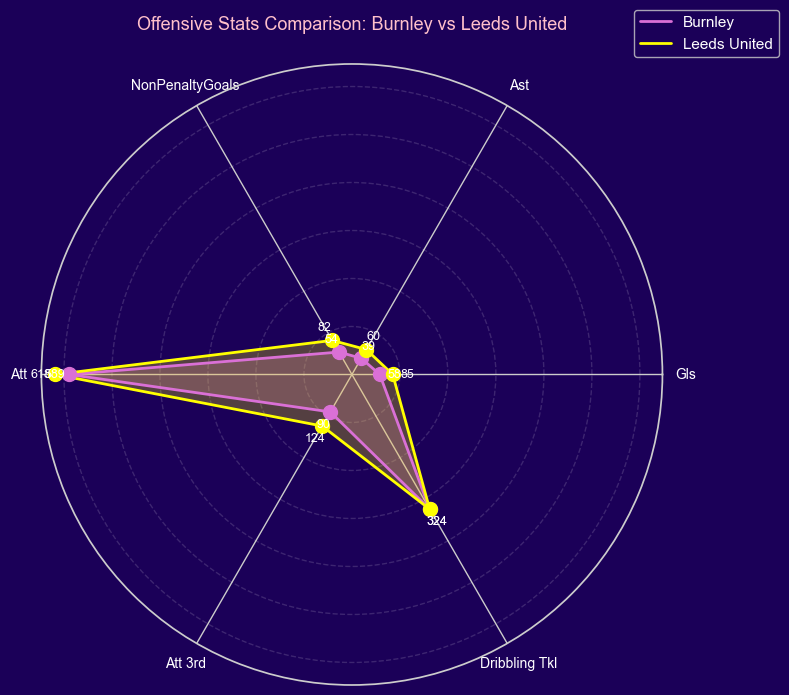

In [114]:
import matplotlib.pyplot as plt
import numpy as np

burnley = df[df['Team'] == 'Burnley']
leeds = df[df['Team'] == 'Leeds United']

offensive_stats = ['Gls', 'Ast', 'NonPenaltyGoals', 'Att', 'Att 3rd', 'Dribbling Tkl']
burnley_off = burnley[offensive_stats].values.flatten()
leeds_off = leeds[offensive_stats].values.flatten()

labels = offensive_stats
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

burnley_off = np.append(burnley_off, burnley_off[0])
leeds_off = np.append(leeds_off, leeds_off[0])

colors = ['Orchid', 'yellow']

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
fig.patch.set_facecolor('#1B0058')
ax.set_facecolor('#1B0058')

ax.plot(angles, burnley_off, color=colors[0], linewidth=2, label='Burnley')
ax.fill(angles, burnley_off, color=colors[0], alpha=0.25)

ax.plot(angles, leeds_off, color=colors[1], linewidth=2, label='Leeds United')
ax.fill(angles, leeds_off, color=colors[1], alpha=0.25)

for i in range(num_vars):
    ax.plot(angles[i], burnley_off[i], 'o', color=colors[0], markersize=10)
    ax.text(
        angles[i], burnley_off[i] + max(burnley_off)*0.05,
        f"{int(burnley_off[i])}", ha='center', va='center',
        color='white', fontsize=9
    )

    ax.plot(angles[i], leeds_off[i], 'o', color=colors[1], markersize=10)
    ax.text(
        angles[i], leeds_off[i] + max(leeds_off)*0.05,
        f"{int(leeds_off[i])}", ha='center', va='center',
        color='white', fontsize=9
    )

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, color='white', fontsize=10)
ax.set_yticklabels([])
ax.yaxis.grid(True, color='white', linestyle='--', alpha=0.15)

plt.title('Offensive Stats Comparison: Burnley vs Leeds United', color='pink', fontsize=13, pad=25)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), facecolor='#1B0058', labelcolor='white')

plt.tight_layout()
plt.show()

Defensive Stats Comparison: Burnley vs Leeds United

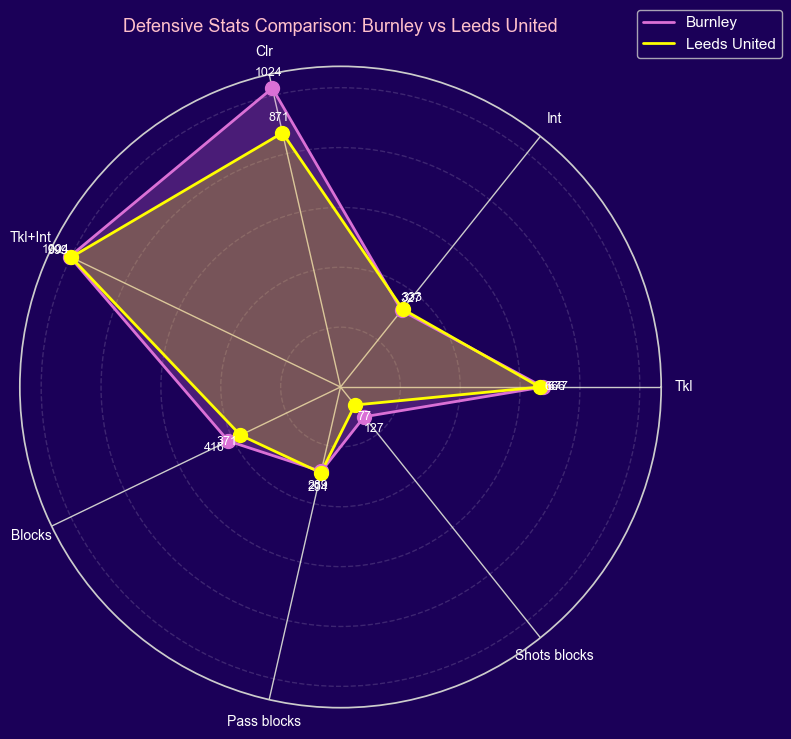

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

burnley = df[df['Team'] == 'Burnley']
leeds = df[df['Team'] == 'Leeds United']

defensive_stats = ['Tkl', 'Int', 'Clr', 'Tkl+Int', 'Blocks', 'Pass blocks', 'Shots blocks']
burnley_def = burnley[defensive_stats].values.flatten()
leeds_def = leeds[defensive_stats].values.flatten()

labels = defensive_stats
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

burnley_def = np.append(burnley_def, burnley_def[0])
leeds_def = np.append(leeds_def, leeds_def[0])

colors = ['Orchid', 'yellow']

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
fig.patch.set_facecolor('#1B0058')
ax.set_facecolor('#1B0058')

ax.plot(angles, burnley_def, color=colors[0], linewidth=2, label='Burnley')
ax.fill(angles, burnley_def, color=colors[0], alpha=0.25)

ax.plot(angles, leeds_def, color=colors[1], linewidth=2, label='Leeds United')
ax.fill(angles, leeds_def, color=colors[1], alpha=0.25)

for i in range(num_vars):
    ax.plot(angles[i], burnley_def[i], 'o', color=colors[0], markersize=10)
    ax.text(
        angles[i], burnley_def[i] + max(burnley_def)*0.05,
        f"{int(burnley_def[i])}", ha='center', va='center',
        color='white', fontsize=9
    )

    ax.plot(angles[i], leeds_def[i], 'o', color=colors[1], markersize=10)
    ax.text(
        angles[i], leeds_def[i] + max(leeds_def)*0.05,
        f"{int(leeds_def[i])}", ha='center', va='center',
        color='white', fontsize=9
    )

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, color='white', fontsize=10)
ax.set_yticklabels([])
ax.yaxis.grid(True, color='white', linestyle='--', alpha=0.15)

plt.title('Defensive Stats Comparison: Burnley vs Leeds United', color='pink', fontsize=13, pad=25)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), facecolor='#1B0058', labelcolor='white')

plt.tight_layout()
plt.show()

xG vs Goals Scored

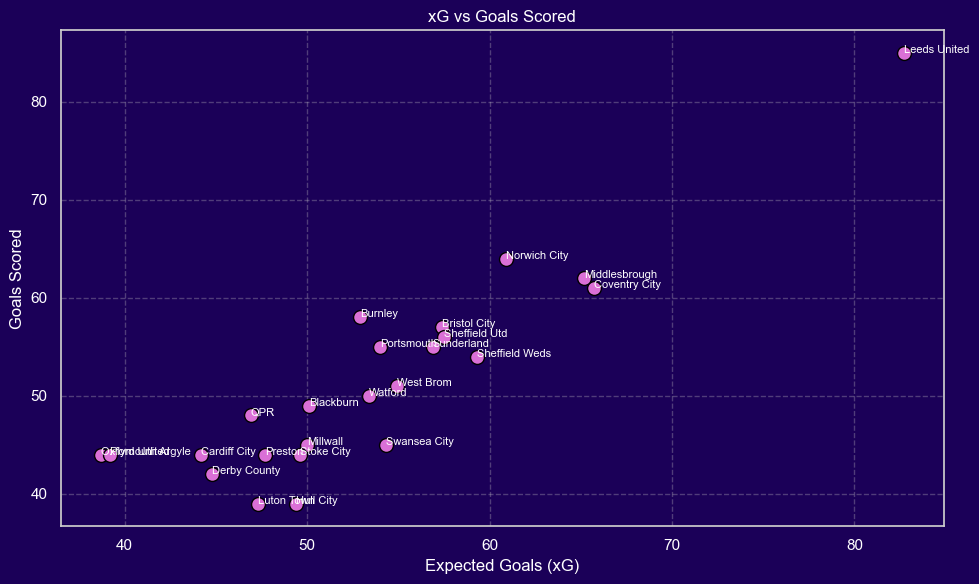

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(df['xG'], df['Gls'], color='Orchid', edgecolor='black', s=100)

for i, team in enumerate(df['Team']):
    plt.text(df['xG'].iloc[i], df['Gls'].iloc[i], team, fontsize=8, color='white')

plt.xlabel('Expected Goals (xG)', color='white')
plt.ylabel('Goals Scored', color='white')
plt.title('xG vs Goals Scored', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(True, linestyle='--', alpha=0.3)
plt.gca().set_facecolor("#1B0058")
plt.gcf().patch.set_facecolor("#1B0058")
plt.tight_layout()
plt.show()

Expected Goals (xG) vs Expected Assists (xAG) per Team

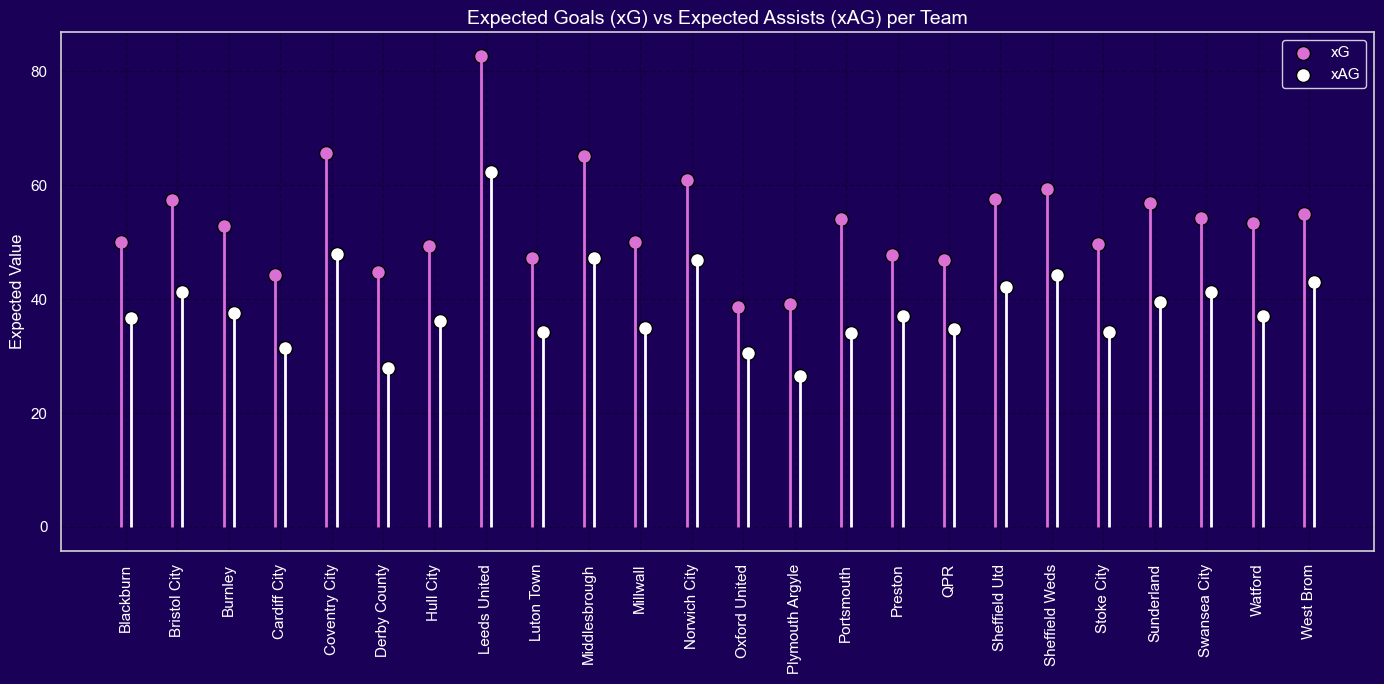

In [52]:
import matplotlib.pyplot as plt
import numpy as np

teams = df['Team']
xg = df['xG']
xag = df['xAG']
indices = np.arange(len(teams))

bg_color = "#1B0058"
text_color = "white"

plt.figure(figsize=(14, 7))

plt.vlines(indices - 0.1, 0, xg, color='orchid', linewidth=2)
plt.scatter(indices - 0.1, xg, s=100, edgecolor='black', color='orchid', label='xG')

plt.vlines(indices + 0.1, 0, xag, color='white', linewidth=2)
plt.scatter(indices + 0.1, xag, s=100, edgecolor='black', color='white', label='xAG')

plt.xticks(indices, teams, rotation=90, ha='center', color=text_color)
plt.ylabel("Expected Value", color=text_color)
plt.title("Expected Goals (xG) vs Expected Assists (xAG) per Team", fontsize=14, color=text_color)

plt.gca().set_facecolor(bg_color)
plt.gcf().patch.set_facecolor(bg_color)
plt.tick_params(colors=text_color)
plt.grid(True, linestyle='--', alpha=0.3, color='Black')
plt.legend(facecolor=bg_color, edgecolor='white', labelcolor=text_color)

plt.tight_layout()
plt.show()

Distribution of Progressive Passes

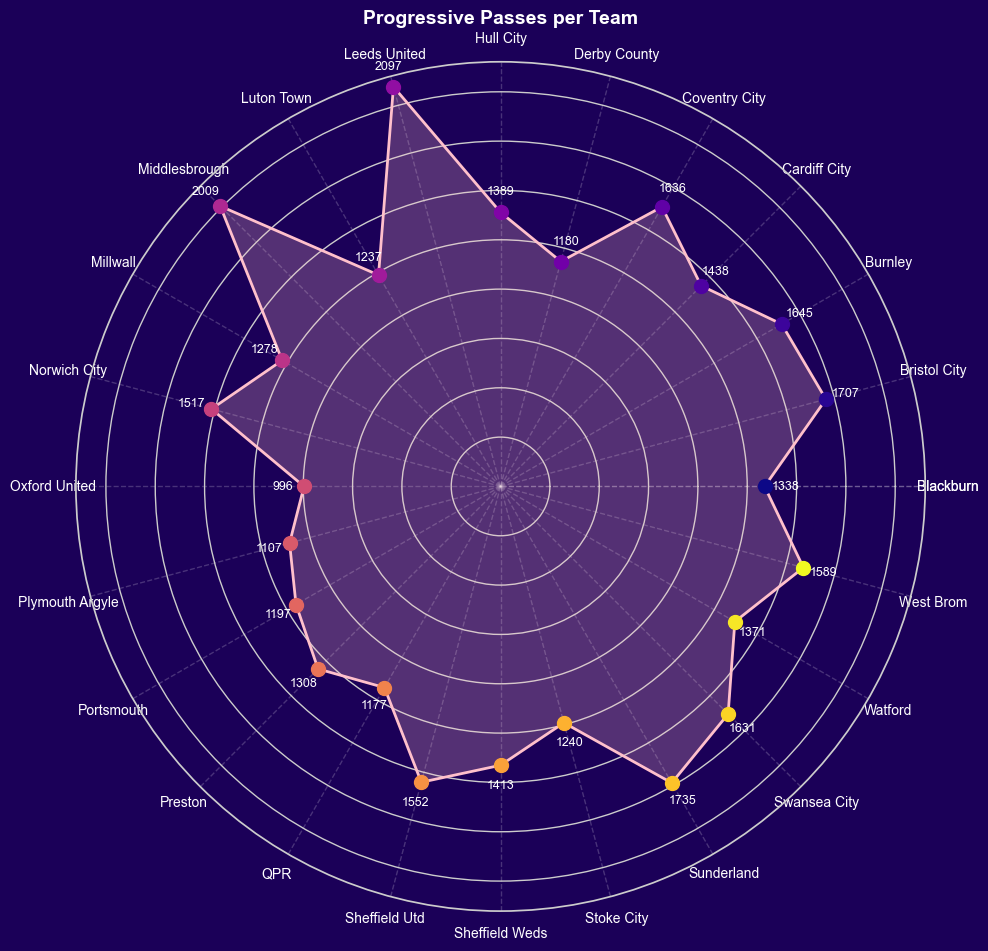

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

teams = df['Team']
prg_passes = df['PrgPasses'].values

num_vars = len(teams)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
prg_passes = np.append(prg_passes, prg_passes[0])
angles += angles[:1]

colors = plt.cm.plasma(np.linspace(0, 1, num_vars))
colors = np.vstack([colors, colors[0]])

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_facecolor('#1B0058')
fig.patch.set_facecolor('#1B0058')

ax.plot(angles, prg_passes, color='pink', linewidth=2)
ax.fill(angles, prg_passes, color='pink', alpha=0.25)

for i in range(num_vars):
    ax.plot(angles[i], prg_passes[i], 'o', color=colors[i], markersize=10)
    ax.text(
        angles[i], prg_passes[i] + max(prg_passes)*0.05,
        f"{int(prg_passes[i])}",
        ha='center', va='center',
        color='white', fontsize=9
    )

teams = list(teams)
teams.append(teams[0])
ax.set_xticks(angles)
ax.set_xticklabels(teams, color='white', fontsize=10)

ax.set_yticklabels([])
ax.xaxis.grid(True, color = 'white', linestyle ='--', alpha = 0.2)
plt.title('Progressive Passes per Team', color='white', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

Long Passes Completed Distribution

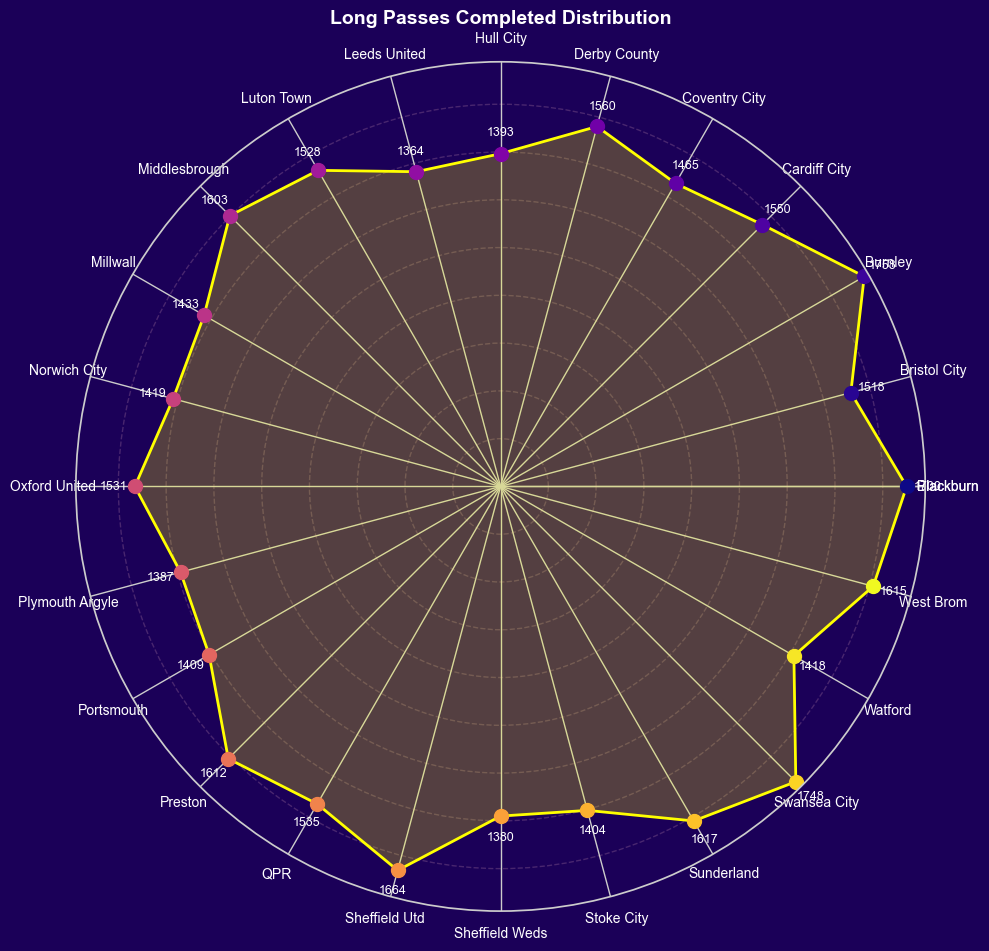

In [99]:
import matplotlib.pyplot as plt
import numpy as np

teams = df['Team']
long_passes = df['LongPassesCmp'].values

num_vars = len(teams)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
long_passes = np.append(long_passes, long_passes[0])
angles += angles[:1]

colors = plt.cm.plasma(np.linspace(0, 1, num_vars))
colors = np.vstack([colors, colors[0]])  

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_facecolor('#1B0058')
fig.patch.set_facecolor('#1B0058')

ax.plot(angles, long_passes, color='yellow', linewidth=2)
ax.fill(angles, long_passes, color='yellow', alpha=0.25)

for i in range(num_vars):
    ax.plot(angles[i], long_passes[i], 'o', color=colors[i], markersize=10)
    ax.text(
        angles[i], long_passes[i] + max(long_passes)*0.05,
        f"{int(long_passes[i])}",
        ha='center', va='center',
        color='white', fontsize=9
    )

teams = list(teams)
teams.append(teams[0])
ax.set_xticks(angles)
ax.set_xticklabels(teams, color='white', fontsize=10)

ax.set_yticklabels([])
ax.yaxis.grid(True, color= 'pink', linestyle= '--', alpha = 0.2)

plt.title('Long Passes Completed Distribution', color='white', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

Defensive Actions per Team

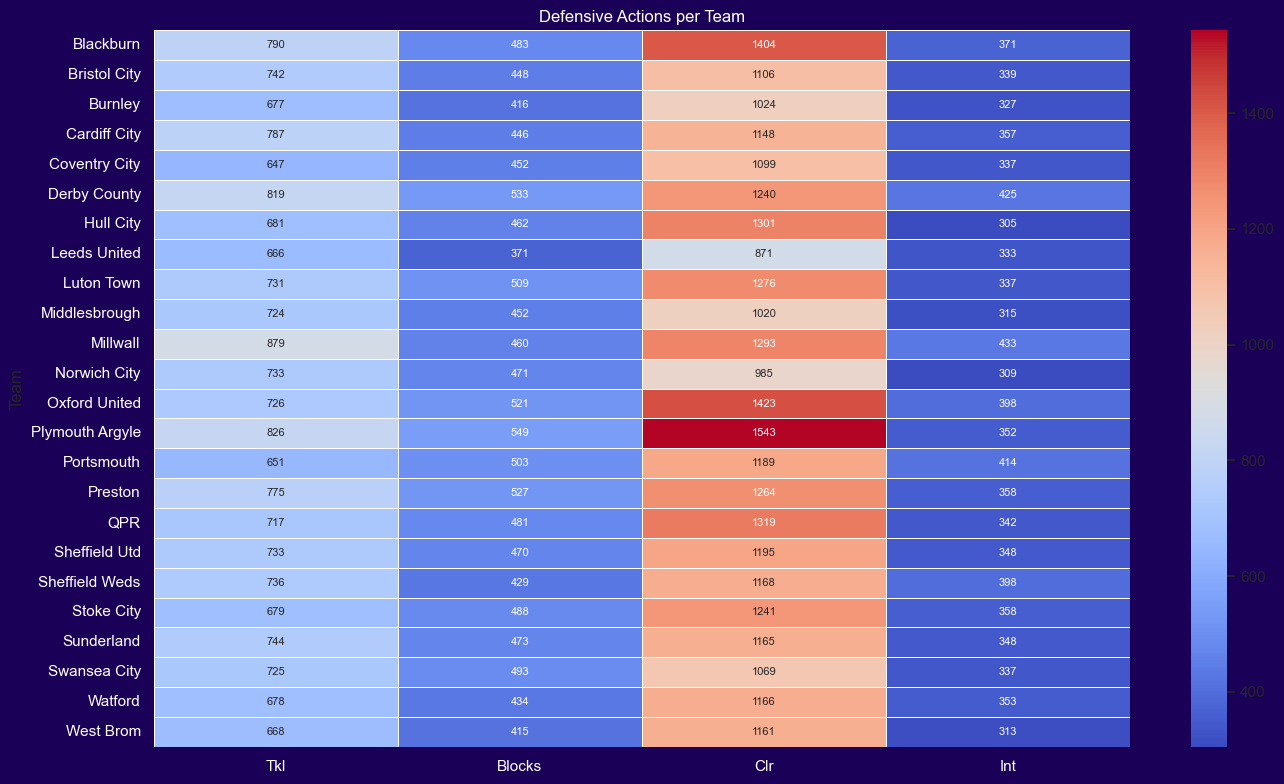

In [8]:
import seaborn as sns

plt.figure(figsize=(14, 8))
defensive_stats = df[['Tkl', 'Blocks', 'Clr', 'Int']].set_index(df['Team'])
sns.heatmap(defensive_stats, annot=True, cmap='coolwarm', linewidths=0.5, fmt='g',
            cbar=True, annot_kws={"size": 8})

plt.title('Defensive Actions per Team', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().set_facecolor("#1B0058")
plt.gcf().patch.set_facecolor("#1B0058")
plt.tight_layout()
plt.show()

Successful Short Passes per Team

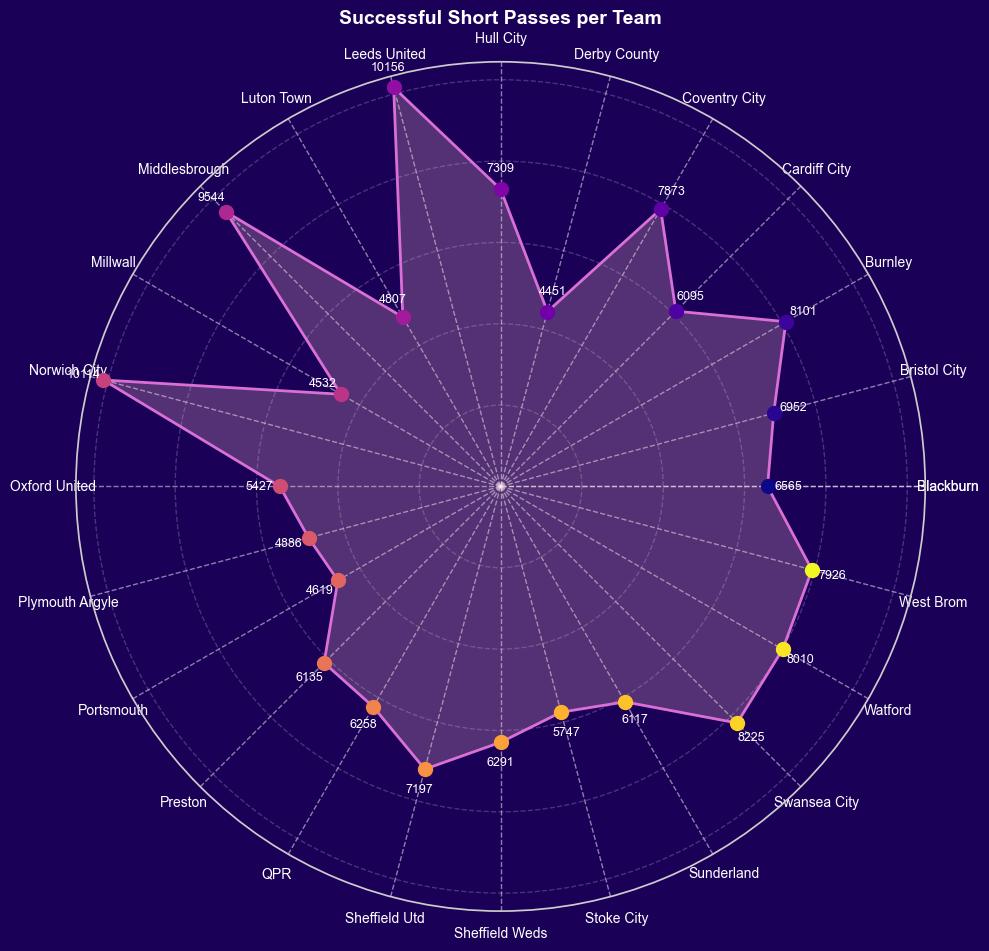

In [104]:
import matplotlib.pyplot as plt
import numpy as np

teams = df['Team']
short_passes = df['ShortPassesCmp'].values

num_vars = len(teams)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
short_passes = np.append(short_passes, short_passes[0])
angles += angles[:1]

colors = plt.cm.plasma(np.linspace(0, 1, num_vars))
colors = np.vstack([colors, colors[0]])

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_facecolor('#1B0058')
fig.patch.set_facecolor('#1B0058')

ax.plot(angles, short_passes, color='Orchid', linewidth=2)
ax.fill(angles, short_passes, color='pink', alpha=0.25)

for i in range(num_vars):
    ax.plot(angles[i], short_passes[i], 'o', color=colors[i], markersize=10)
    ax.text(
        angles[i], short_passes[i] + max(short_passes)*0.05,
        f"{int(short_passes[i])}",
        ha='center', va='center',
        color='white', fontsize=9
    )

teams = list(teams)
teams.append(teams[0])
ax.set_xticks(angles)
ax.set_xticklabels(teams, color='white', fontsize=10)

ax.set_yticklabels([])
ax.xaxis.grid(True, color='white', linestyle='--', alpha=0.5)
ax.yaxis.grid(True, color='white', linestyle='--', alpha=0.2)

plt.title('Successful Short Passes per Team', color='white', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


Short vs Long Passes Completed

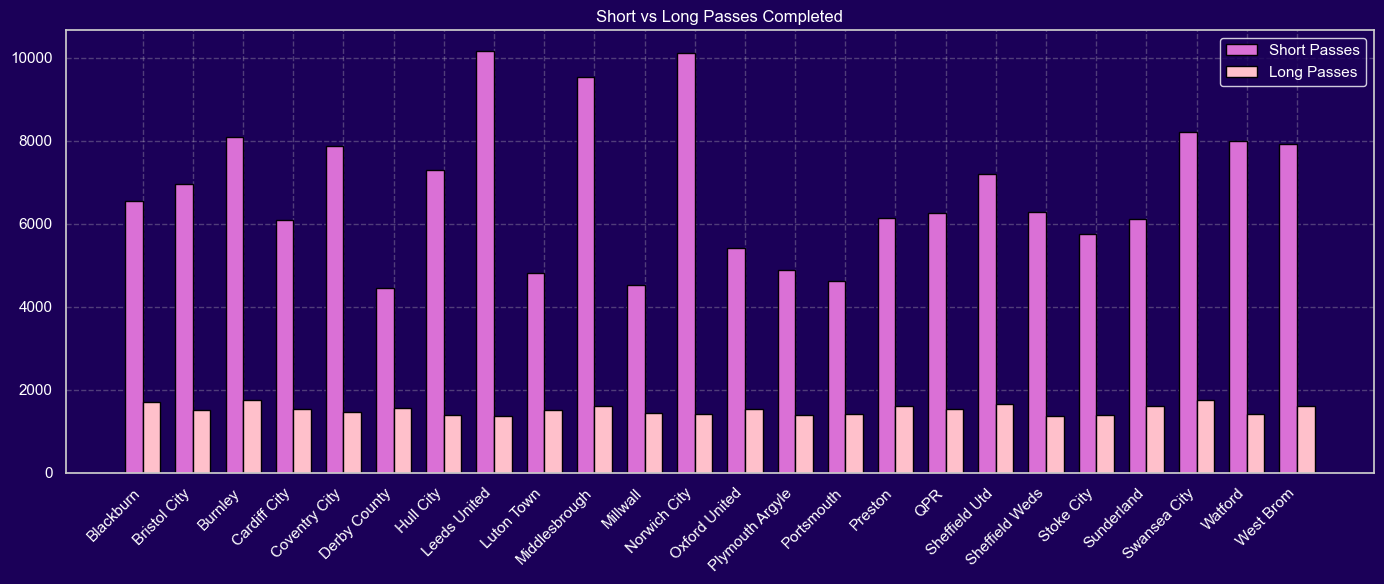

In [106]:
x = np.arange(len(df['Team']))
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, df['ShortPassesCmp'], width, label='Short Passes', color='Orchid', edgecolor = 'Black')
plt.bar(x + width/2, df['LongPassesCmp'], width, label='Long Passes', color='pink', edgecolor = 'Black')

plt.xticks(x, df['Team'], rotation=45, ha='right', color='white')
plt.yticks(color='white')
plt.title('Short vs Long Passes Completed', color='white')
plt.legend(facecolor="#1B0058", edgecolor='white', labelcolor='white')
plt.gca().set_facecolor("#1B0058")
plt.gcf().patch.set_facecolor("#1B0058")
plt.grid(True, linestyle= '--', alpha=0.3)
plt.tight_layout()
plt.show()